In [27]:
# ============================================================
# Notebook setup: run this before everything
# ============================================================
# -- Copied from lecture
%load_ext autoreload
%config IPCompleter.greedy=True
%autoreload 1
%aimport util
import logging
import os
import random

import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from util import util

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Control figure size
interactive_figures = False
if interactive_figures:
    # Normal behavior
    %matplotlib widget
    figsize=(9, 3)
else:
    # PDF export behavior
    figsize=(14, 4)

# Set random seed
os.environ['PYTHONHASHSEED'] = '0'
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Load datasets
X_train, y_train = util.load_dataset_xy('7_gecco2019_train_water_quality.csv')
X_val, y_val = util.load_dataset_xy('8_gecco2019_valid_water_quality.csv')
X_test, y_test = util.load_dataset_xy('6_gecco2019_test_water_quality.csv')

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Neural Network for Contamination Detection
As the dataset at hand not only contains water composition data, but also a label indicating whether the sample is contaminated or not, we can make use of this extra piece of information to train a neural network for contamination detection. This is a typical, supervised classification problem. The neural network will be trained to predict whether a sample is contaminated or not based on its composition.

## Building the Neural Network
For the neural network, we will use the Keras API as done in the lectures. The architecture is a simple feed-forward neural network with two hidden layers of 64 neurons each. Additionally, we will include a dropout layer with a dropout rate of 20% to regularize the model. This helps prevent overfitting and improves generalization. The output layer will have a single neuron with a sigmoid activation function, which is suitable for binary classification problems.

In [28]:
nn1 = util.build_nn_model(input_shape=(X_train.shape[1], ), output_shape=1, hidden=[64, 64], with_dropout=True, output_activation='sigmoid')
nn1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Neural Network
The neural network will be trained using the binary cross-entropy loss function, which is suitable for binary classification problems. The model will be trained for 50 epochs, with a batch size of 64. The training process will be monitored using the loss and F1-score metrics. As the dataset contains only very few contamination events, the F1-score is the ideal metric to evaluate the model's performance.

Epoch 1/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step - f1_score: 0.0049 - loss: 0.6059 - val_f1_score: 0.0000e+00 - val_loss: 0.4373
Epoch 2/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - f1_score: 0.0025 - loss: 0.3621 - val_f1_score: 0.0000e+00 - val_loss: 0.2683
Epoch 3/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - f1_score: 0.0000e+00 - loss: 0.1966 - val_f1_score: 0.0000e+00 - val_loss: 0.1756
Epoch 4/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - f1_score: 0.0000e+00 - loss: 0.1123 - val_f1_score: 0.0000e+00 - val_loss: 0.1308
Epoch 5/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - f1_score: 0.0000e+00 - loss: 0.0704 - val_f1_score: 0.0000e+00 - val_loss: 0.1073
Epoch 6/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - f1_score: 0.0000e+00 - loss: 0.0542 - val_f1_score: 0.0000e+00 - val_loss: 0.0923
Epoch 7/50
2070/2070 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - f1_score: 0.0000e+00 - loss: 0.0423 - val_f1_score: 0.0000e+00 - val_loss: 0.0809
Epoch 8/50
2070/2070 ━━━━━━━

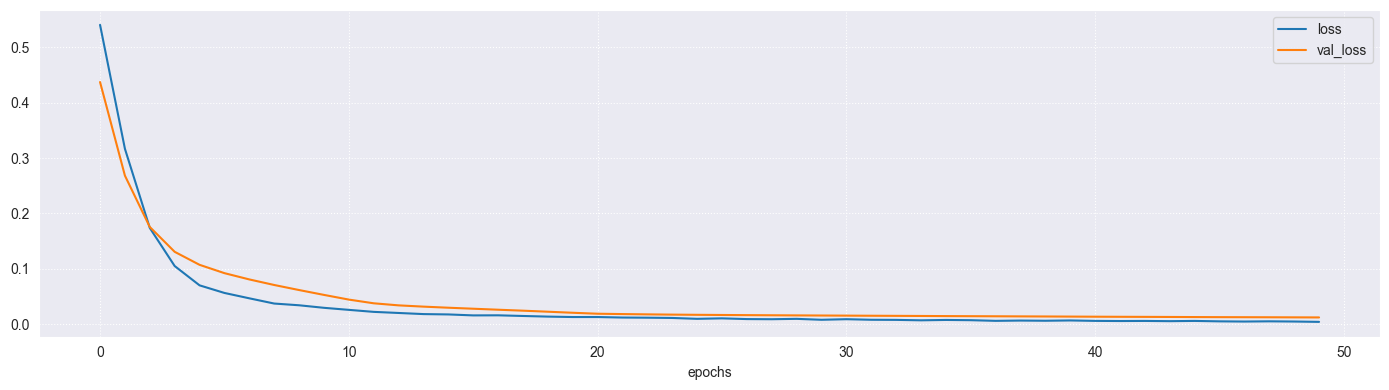

Final scores: loss: 0.0043, val_loss: 0.0123


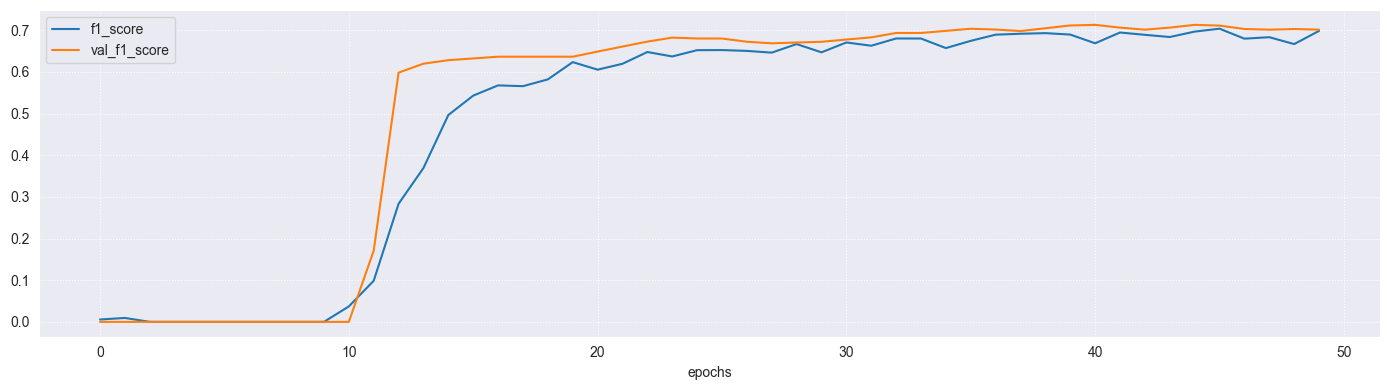

Final scores: f1_score: 0.6983, val_f1_score: 0.7013


In [29]:
# Train the model
f1_score = tf.keras.metrics.F1Score(threshold=0.5)
history = util.train_nn_model(nn1, X_train, y_train,
                              learning_rate=1e-5,
                              loss='binary_crossentropy',
                              epochs=50,
                              validation_data=(X_val, y_val),
                              batch_size=64,
                              metrics=[f1_score],
                              verbose=1)

# Pick loss and F1-score from history
loss_history = util.pick_history_keys(history, ['loss', 'val_loss'])
f1_history = util.pick_history_keys(history, ['f1_score', 'val_f1_score'])

# Plot training history
util.plot_training_history(loss_history, figsize=figsize)
util.plot_training_history(f1_history, figsize=figsize)

## Evaluation on the Training Data
After training the neural network, we can evaluate its performance on the training data. The confusion matrix and classification report will be printed to the console.

In [30]:
# Predict probabilities on the training set
y_pred_prob = nn1.predict(X_train)
# Convert probabilities to class labels (thresholding at 0.5 for binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

4140/4140 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step
Confusion Matrix:
 [[132249     19]
 [    93    119]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    132268
        True       0.86      0.56      0.68       212

    accuracy                           1.00    132480
   macro avg       0.93      0.78      0.84    132480
weighted avg       1.00      1.00      1.00    132480



The feed-forward neural network shows excellent overall performance on the training dataset, achieving near-perfect accuracy with weighted metrics close to 1.00. The confusion matrix reveals that the model correctly classified almost all negative cases (132,249 out of 132,268), with only 19 negatives misclassified as positive, while 93 positive cases were incorrectly labeled as negative. However, the performance for the positive class is relatively lower, with a precision of 0.86 and a recall rate of 0.56, indicating that the network misses a significant number of true positive cases. Overall, the network is highly effective for the predominant negative class, but further optimization may be needed to better capture the positive cases.

## Evaluation on the Test Data
Much more interesting, however, is the performance on the test data.

In [31]:
# Predict probabilities on the test set
y_pred_prob = nn1.predict(X_test)
# Convert probabilities to class labels (thresholding at 0.5 for binary classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

990/990 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
Confusion Matrix:
 [[31430    29]
 [   94    97]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     31459
        True       0.77      0.51      0.61       191

    accuracy                           1.00     31650
   macro avg       0.88      0.75      0.81     31650
weighted avg       1.00      1.00      1.00     31650



On the test data, the feed-forward neural network maintains very high overall performance. While overall accuracy remains near perfect, the F1-score for the positive class dropped from approximately 0.68 on the training data to 0.61 on the test data, indicating a modest reduction in the model’s balance between precision and recall on unseen data. The confusion matrix for the test set shows misclassifications, with 29 negatives incorrectly predicted as positive and 94 positives misclassified as negative. However, similar to the training results, the performance on the minority (positive) class remains considerably lower: the test set shows a precision of 0.77 and a recall of 0.51, compared to 0.86 and 0.56 on the training set. This suggests that while the model generalizes well overall, it still struggles somewhat to consistently detect the positive class in unseen data.